# PROBLEM STATEMENT-

"The dataset records whether individuals attended their scheduled healthcare appointments."

In [281]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [4]:
h1= pd.read_csv(r"C:\Users\aksha\Downloads\healthcare_noshows.csv")
h1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date.diff,Showed_up
0,2.987250e+13,5642903,F,29/04/2016,29/04/2016,62,JARDIM DA PENHA,False,True,False,False,False,False,0,True
1,5.589980e+14,5642503,M,29/04/2016,29/04/2016,56,JARDIM DA PENHA,False,False,False,False,False,False,0,True
2,4.262960e+12,5642549,F,29/04/2016,29/04/2016,62,MATA DA PRAIA,False,False,False,False,False,False,0,True
3,8.679510e+11,5642828,F,29/04/2016,29/04/2016,8,PONTAL DE CAMBURI,False,False,False,False,False,False,0,True
4,8.841190e+12,5642494,F,29/04/2016,29/04/2016,56,JARDIM DA PENHA,False,True,True,False,False,False,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572130e+12,5651768,F,03/05/2016,07/06/2016,56,MARIA ORTIZ,False,False,False,False,False,True,35,True
106983,3.596270e+12,5650093,F,03/05/2016,07/06/2016,51,MARIA ORTIZ,False,False,False,False,False,True,35,True
106984,1.557660e+13,5630692,F,27/04/2016,07/06/2016,21,MARIA ORTIZ,False,False,False,False,False,True,41,True
106985,9.213490e+13,5630323,F,27/04/2016,07/06/2016,38,MARIA ORTIZ,False,False,False,False,False,True,41,True


In [5]:
h1.shape

(106987, 15)

In [6]:
h1.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173525e+12,5.640490e+06,19.000000,0.000000
50%,3.172460e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999820e+14,5.790484e+06,115.000000,179.000000


In [7]:
h1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date.diff,Showed_up
0,2.987250e+13,5642903,F,29/04/2016,29/04/2016,62,JARDIM DA PENHA,False,True,False,False,False,False,0,True
1,5.589980e+14,5642503,M,29/04/2016,29/04/2016,56,JARDIM DA PENHA,False,False,False,False,False,False,0,True
2,4.262960e+12,5642549,F,29/04/2016,29/04/2016,62,MATA DA PRAIA,False,False,False,False,False,False,0,True
3,8.679510e+11,5642828,F,29/04/2016,29/04/2016,8,PONTAL DE CAMBURI,False,False,False,False,False,False,0,True
4,8.841190e+12,5642494,F,29/04/2016,29/04/2016,56,JARDIM DA PENHA,False,True,True,False,False,False,0,True


In [8]:
h1.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date.diff,Showed_up
106982,2.572130e+12,5651768,F,03/05/2016,07/06/2016,56,MARIA ORTIZ,False,False,False,False,False,True,35,True
106983,3.596270e+12,5650093,F,03/05/2016,07/06/2016,51,MARIA ORTIZ,False,False,False,False,False,True,35,True
106984,1.557660e+13,5630692,F,27/04/2016,07/06/2016,21,MARIA ORTIZ,False,False,False,False,False,True,41,True
106985,9.213490e+13,5630323,F,27/04/2016,07/06/2016,38,MARIA ORTIZ,False,False,False,False,False,True,41,True
106986,3.775120e+14,5629448,F,27/04/2016,07/06/2016,54,MARIA ORTIZ,False,False,False,False,False,True,41,True


In [9]:
h1.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Date.diff',
       'Showed_up'],
      dtype='object')

In [10]:
h1.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship          bool
Hipertension         bool
Diabetes             bool
Alcoholism           bool
Handcap              bool
SMS_received         bool
Date.diff           int64
Showed_up            bool
dtype: object

# Rename Columns

In [12]:
h1=h1.rename(columns={"Date.diff":"Date_diff"})

In [13]:
h1.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship          bool
Hipertension         bool
Diabetes             bool
Alcoholism           bool
Handcap              bool
SMS_received         bool
Date_diff           int64
Showed_up            bool
dtype: object

In [14]:
# value count

In [15]:
h1.Gender.value_counts()

Gender
F    70118
M    36869
Name: count, dtype: int64

In [16]:
h1.Showed_up.value_counts() 

Showed_up
True     85307
False    21680
Name: count, dtype: int64

I'll remove unnecessary columns, map some categorical columns to seprate columns.

In [18]:
e1=h1['PatientId']
e2=h1['AppointmentID']
e3=h1['ScheduledDay']
e4=h1['AppointmentDay']
e5=h1['Neighbourhood']

In [19]:
h2=h1.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'],axis=1)
h2

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date_diff,Showed_up
0,F,62,False,True,False,False,False,False,0,True
1,M,56,False,False,False,False,False,False,0,True
2,F,62,False,False,False,False,False,False,0,True
3,F,8,False,False,False,False,False,False,0,True
4,F,56,False,True,True,False,False,False,0,True
...,...,...,...,...,...,...,...,...,...,...
106982,F,56,False,False,False,False,False,True,35,True
106983,F,51,False,False,False,False,False,True,35,True
106984,F,21,False,False,False,False,False,True,41,True
106985,F,38,False,False,False,False,False,True,41,True


In [20]:
h2.shape

(106987, 10)

In [21]:
h2.describe()

,Age,Date_diff
count,106987.000000,106987.000000
mean,38.316085,10.166721
std,22.466214,15.263508
min,1.000000,-6.000000
25%,19.000000,0.000000
50%,38.000000,4.000000
75%,56.000000,14.000000
max,115.000000,179.000000


# MISSING VALUE TREATMENT 

In [23]:
h2.isnull().sum()

Gender          0
Age             0
Scholarship     0
Hipertension    0
Diabetes        0
Alcoholism      0
Handcap         0
SMS_received    0
Date_diff       0
Showed_up       0
dtype: int64

There is no missing values.

# DATA-TYPE CONVERSION

In [26]:
h2.dtypes

Gender          object
Age              int64
Scholarship       bool
Hipertension      bool
Diabetes          bool
Alcoholism        bool
Handcap           bool
SMS_received      bool
Date_diff        int64
Showed_up         bool
dtype: object

In [27]:
h2.Gender=le.fit_transform(h2.Gender)
h2.Scholarship=le.fit_transform(h2.Scholarship)
h2.Hipertension=le.fit_transform(h2.Hipertension)
h2.Diabetes=le.fit_transform(h2.Diabetes)
h2.Alcoholism=le.fit_transform(h2.Alcoholism)
h2.Handcap=le.fit_transform(h2.Handcap)
h2.SMS_received=le.fit_transform(h2.SMS_received)
h2.Showed_up=le.fit_transform(h2.Showed_up)

In [28]:
h2.dtypes

Gender          int32
Age             int64
Scholarship     int64
Hipertension    int64
Diabetes        int64
Alcoholism      int64
Handcap         int64
SMS_received    int64
Date_diff       int64
Showed_up       int64
dtype: object

In [29]:
h2.head(2)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date_diff,Showed_up
0,0,62,0,1,0,0,0,0,0,1
1,1,56,0,0,0,0,0,0,0,1


# Drop Duplicates

In [31]:
h2.shape

(106987, 10)

In [32]:
#d2.drop_duplicates(inplace=True)

In [33]:
h2.shape

(106987, 10)

# Visualization

In [35]:
h2.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date_diff,Showed_up
0,0,62,0,1,0,0,0,0,0,1
1,1,56,0,0,0,0,0,0,0,1
2,0,62,0,0,0,0,0,0,0,1
3,0,8,0,0,0,0,0,0,0,1
4,0,56,0,1,1,0,0,0,0,1


Text(0.5, 1.0, 'Distrubution of Gender')

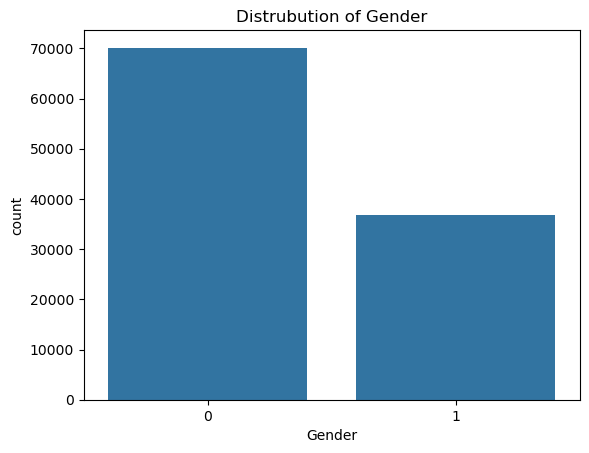

In [36]:
sns.countplot(x="Gender",data=h2)
plt.title("Distrubution of Gender")

 countplot :- shows the distribution of male and female patients.

Text(0.5, 1.0, 'Count of Hipertension')

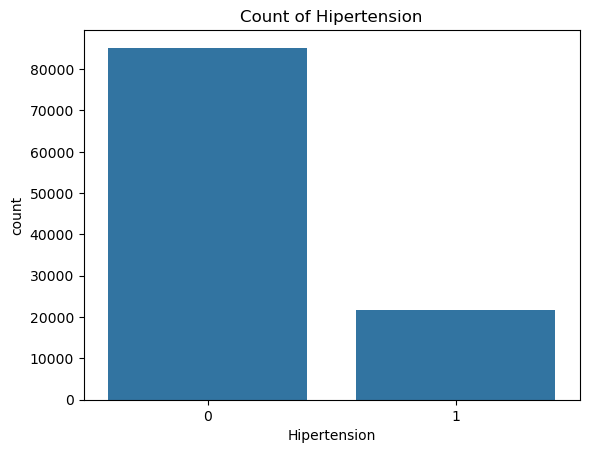

In [38]:
sns.countplot(x="Hipertension",data=h2)
plt.title("Count of Hipertension")

 countplot :- shows the distribution of patients with and without hypertension

Text(0.5, 1.0, 'Distrubution of Age')

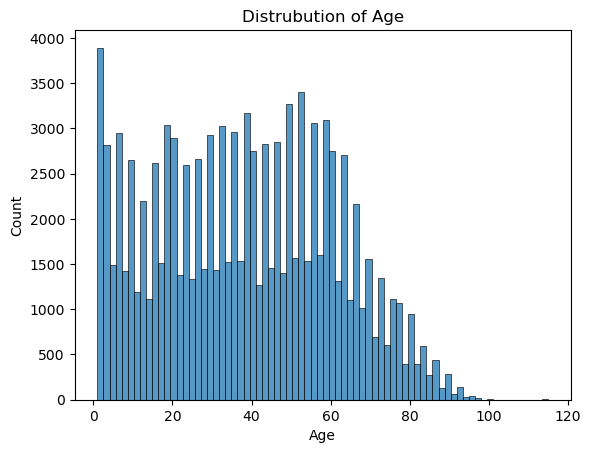

In [40]:
sns.histplot(x="Age",data=h2)
plt.title("Distrubution of Age")


 displays the distribution of patient ages, highlighting which age groups are most prevalent in the healthcare appointment data.

Text(0.5, 1.0, 'Showed_up vs Data_diff')

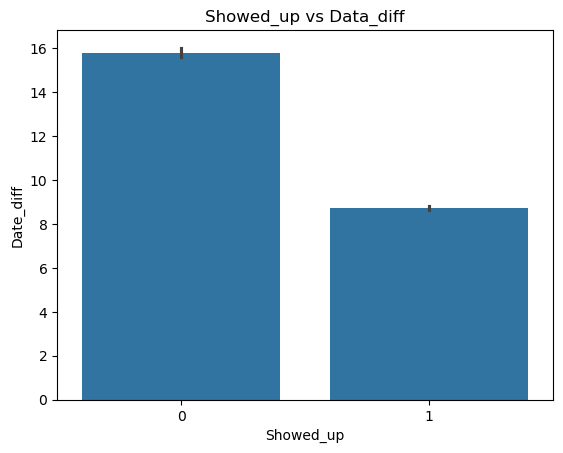

In [42]:
sns.barplot(x="Showed_up",y="Date_diff",data=h2)
plt.title("Showed_up vs Data_diff")

 barplot shows relationship between whether a patient showed up for their appointment and the average number of
 days between scheduling and the appointment, revealing if longer waiting times affect attendance.

In [44]:
d3=h2.corr()
d3

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date_diff,Showed_up
Gender,1.000000,-0.094108,-0.113679,-0.051312,-0.030027,0.110410,0.024599,-0.045852,-0.030505,0.003238
Age,-0.094108,1.000000,-0.112699,0.502091,0.290631,0.090391,0.079726,0.005251,0.038880,0.067025
Scholarship,-0.113679,-0.112699,1.000000,-0.024530,-0.027622,0.033527,-0.010465,-0.000010,-0.030439,-0.029370
Hipertension,-0.051312,0.502091,-0.024530,1.000000,0.430827,0.085459,0.082909,-0.008805,-0.016996,0.037280
Diabetes,-0.030027,0.290631,-0.027622,0.430827,1.000000,0.016874,0.057945,-0.016136,-0.027339,0.015928
Alcoholism,0.110410,0.090391,0.033527,0.085459,0.016874,1.000000,0.002864,-0.027403,-0.038949,0.000517
Handcap,0.024599,0.079726,-0.010465,0.082909,0.057945,0.002864,1.000000,-0.026256,-0.021101,0.007620
SMS_received,-0.045852,0.005251,-0.000010,-0.008805,-0.016136,-0.027403,-0.026256,1.000000,0.396482,-0.127253
Date_diff,-0.030505,0.038880,-0.030439,-0.016996,-0.027339,-0.038949,-0.021101,0.396482,1.000000,-0.185704
Showed_up,0.003238,0.067025,-0.029370,0.037280,0.015928,0.000517,0.007620,-0.127253,-0.185704,1.000000


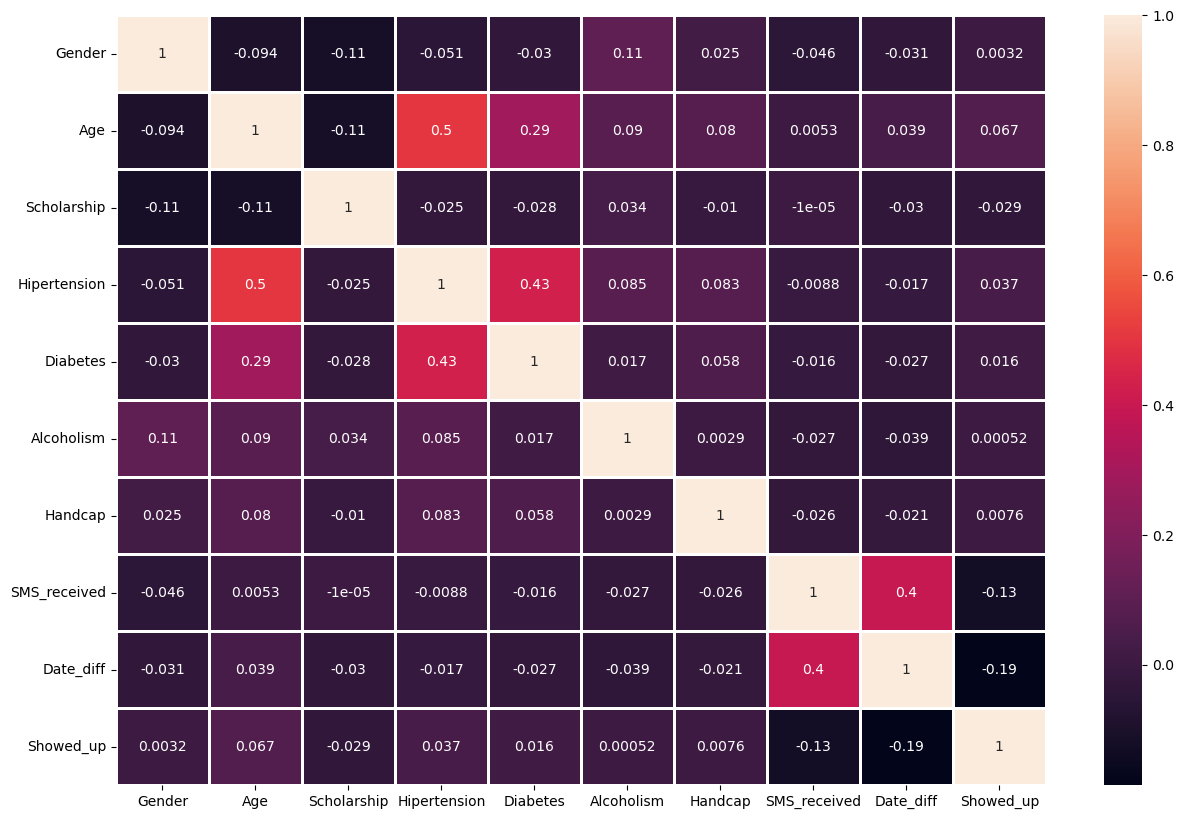

In [45]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(d3,linewidth=1,annot=True)

 heatmap it is used to show corelation between different factors

<Axes: xlabel='Age', ylabel='Density'>

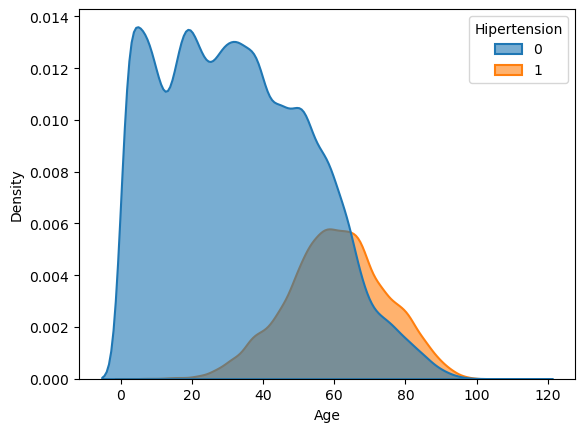

In [47]:
sns.kdeplot(data=h2,x="Age",hue="Hipertension",fill=True,alpha=0.6,linewidth=1.5)

 kdeplot shows comparing age distributions by hypertension

# Models Building

In [50]:
h2.shape

(106987, 10)

In [51]:
h2.head(2)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date_diff,Showed_up
0,0,62,0,1,0,0,0,0,0,1
1,1,56,0,0,0,0,0,0,0,1


In [52]:
x=h2.iloc[:,0:-1]
y=h2.iloc[:,-1]
#x.head()
#y.head()

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((85589, 9), (21398, 9), (85589,), (21398,))

# 1) logistic regression

In [56]:
lg= LogisticRegression()

In [57]:
lg.fit(x_train,y_train)

LogisticRegression()

In [58]:
p1=lg.predict(x_test)

In [59]:
p_value=lg.predict_proba(x_test)

In [60]:
from sklearn.metrics import confusion_matrix 

In [61]:
m1=confusion_matrix(p1,y_test)
m1

array([[   63,   134],
       [ 4238, 16963]], dtype=int64)

In [62]:
TN,FP,FN,TP =m1.ravel()

In [63]:
lp = TP / (TP + FP)
lp

0.9921623676668422

In [64]:
lr = TP / (TP + FN)
lr

0.8001037686901561

In [65]:
lf1 = 2 * (lp * lr) / (lp + lr)
lf1

0.8858426027468796

In [66]:
ac1=m1.diagonal().sum()/m1.sum()*100
ac1 

79.56818394242453

In [67]:
from sklearn.metrics import classification_report
print(classification_report(p1,y_test))

              precision    recall  f1-score   support

           0       0.01      0.32      0.03       197
           1       0.99      0.80      0.89     21201

    accuracy                           0.80     21398
   macro avg       0.50      0.56      0.46     21398
weighted avg       0.98      0.80      0.88     21398



# PRC -TN Rate is high

In [69]:
df=pd.DataFrame(p_value)
df

,0,1
0,0.191111,0.808889
1,0.148176,0.851824
2,0.180512,0.819488
3,0.121600,0.878400
4,0.116819,0.883181
...,...,...
21393,0.321388,0.678612
21394,0.244156,0.755844
21395,0.196090,0.803910
21396,0.201856,0.798144


In [70]:
precision,recall,threshold=precision_recall_curve(y_test,df.iloc[:,1])

Text(0.5, 1.0, 'precision-recall')

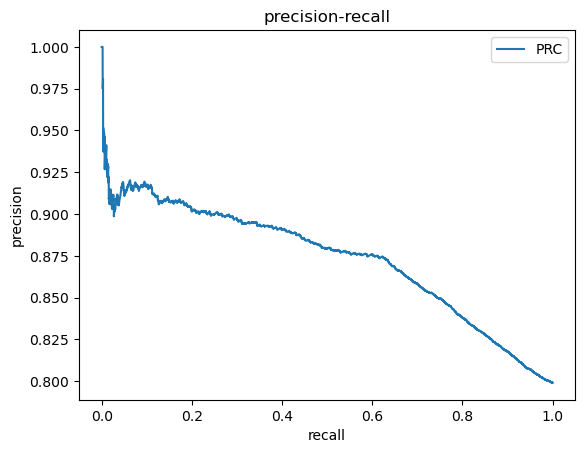

In [71]:
plt.plot(recall,precision,label="PRC")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper right")
plt.title("precision-recall")

# 2) Dicission tree

In [73]:
dt=DecisionTreeClassifier()

In [74]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [75]:
d_p=dt.predict(x_test)

In [76]:
d_m=confusion_matrix(d_p,y_test)
d_m

array([[ 1192,  2351],
       [ 3109, 14746]], dtype=int64)

In [77]:
TN,FP,FN,TP =d_m.ravel()

In [78]:
dp= TP/ (TP + FP)
dp

0.8624904954085512

In [79]:
dr= TP / (TP + FN)
dr

0.8258751050126015

In [80]:
df1= 2* (dp * dr) / (dp + dr)
df1

0.8437857633325704

In [81]:
d_acc=d_m.diagonal().sum()/d_m.sum()*100
d_acc

74.48359659781289

In [82]:
print(classification_report(d_p,y_test))

              precision    recall  f1-score   support

           0       0.28      0.34      0.30      3543
           1       0.86      0.83      0.84     17855

    accuracy                           0.74     21398
   macro avg       0.57      0.58      0.57     21398
weighted avg       0.77      0.74      0.75     21398



# 3) Random Forest

In [84]:
rf=RandomForestClassifier()

In [85]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
rp1=rf.predict(x_test)

In [87]:
r_m=confusion_matrix(rp1,y_test)
r_m

array([[  872,  1562],
       [ 3429, 15535]], dtype=int64)

In [88]:
TN,FP,FN,TP =r_m.ravel()

In [89]:
rp= TP/ (TP + FP)
rp

0.9086389425045329

In [90]:
rr= TP / (TP + FN)
rr

0.819183716515503

In [91]:
rf1= 2* (rp * rr) / (rp + rr)
rf1

0.8615956296275754

In [92]:
r_acc=r_m.diagonal().sum()/r_m.sum()*100
r_acc

76.67539022338536

In [93]:
print(classification_report(rp1,y_test))

              precision    recall  f1-score   support

           0       0.20      0.36      0.26      2434
           1       0.91      0.82      0.86     18964

    accuracy                           0.77     21398
   macro avg       0.56      0.59      0.56     21398
weighted avg       0.83      0.77      0.79     21398



# 4) KNN

In [95]:
knn=KNeighborsClassifier(n_neighbors=40)

In [96]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [97]:
kp1=knn.predict(x_test)

In [98]:
k_c=confusion_matrix(kp1,y_test)
k_c

array([[  146,   245],
       [ 4155, 16852]], dtype=int64)

In [99]:
TN,FP,FN,TP =k_c.ravel()

In [100]:
kp= TP/ (TP + FP)
kp

0.985670000584898

In [101]:
kr= TP / (TP + FN)
kr

0.8022087875470082

In [102]:
kf1= 2* (kp * kr) / (kp + kr)
kf1

0.884526558891455

In [103]:
k_acc=k_c.diagonal().sum()/k_c.sum()*100
k_acc

79.43733059164408

In [104]:
print(classification_report(kp1,y_test))

              precision    recall  f1-score   support

           0       0.03      0.37      0.06       391
           1       0.99      0.80      0.88     21007

    accuracy                           0.79     21398
   macro avg       0.51      0.59      0.47     21398
weighted avg       0.97      0.79      0.87     21398



# 5)SVM

In [106]:
svc=SVC()
svc.fit(x_train,y_train)
sp=svc.predict(x_test)
sm=confusion_matrix(sp,y_test)
sm
TN, FP, FN, TP = sm.ravel()
#s_p = TP / (TP + FP)
s_p=0
#s_r = TP / (TP + FN)
s_r=0
#s_f1 = 2 * (s_p * s_r) / (s_p + s_r)
s_f1=0
s_acc=sm.diagonal().sum()/sm.sum()*100
s_acc
print(classification_report(sp,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89     21398

    accuracy                           0.80     21398
   macro avg       0.50      0.40      0.44     21398
weighted avg       1.00      0.80      0.89     21398



# 6) NAIVE BAYES

In [108]:
print(np.any(x_train < 0))  # This will return True if there are any negative values
x_train[x_train < 0] = 0
nb=MultinomialNB()
nb.fit(x_train,y_train)
np1=nb.predict(x_test)
n_m=confusion_matrix(np1,y_test)
n_m
TN,FP,FN,TP =n_m.ravel()
np= TP/ (TP + FP)
np
nr= TP / (TP + FN)
nr
nf1= 2* (np * nr) / (np + nr)
nf1
n_acc=n_m.diagonal().sum()/n_m.sum()*100
n_acc
print(classification_report(np1,y_test))

True
              precision    recall  f1-score   support

           0       0.45      0.33      0.38      5891
           1       0.77      0.85      0.81     15507

    accuracy                           0.71     21398
   macro avg       0.61      0.59      0.60     21398
weighted avg       0.68      0.71      0.69     21398



 # REPORT

In [110]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","SVM"," NAIVE BAYES"]
list2=[ac1,d_acc,r_acc,k_acc,s_acc,n_acc]
list3=[lp,dp,rp,kp,s_p,np]
list4=[lr,dr,rr,kr,s_r,nr]
list5=[lf1,df1,rf1,kf1,s_f1,nf1]

In [111]:
result=pd.DataFrame({"MODEL NAME":list1,"ACCURACY":list2,"PRECISION":list3,"RECALL":list4,"F-1 SCORE":list5})
result

,MODEL NAME,ACCURACY,PRECISION,RECALL,F-1 SCORE
0,LOGISTIC REGRESSION,79.568184,0.992162,0.800104,0.885843
1,DECISION TREE,74.483597,0.862490,0.825875,0.843786
2,RANDOM FOREST,76.675390,0.908639,0.819184,0.861596
3,KNN,79.437331,0.985670,0.802209,0.884527
4,SVM,79.899991,0.000000,0.000000,0.000000
5,NAIVE BAYES,70.623423,0.769667,0.848585,0.807202


# Logistic Regression is best fitted model in the good  accuracy,precision and recall.

# Class Imbalancement Treatment

# Inbalance Statement

In [115]:
h2.Showed_up.value_counts()

Showed_up
1    85307
0    21680
Name: count, dtype: int64

# Random undersampling

In [117]:
#import random
#c_0,c_1=h2.Showed_up.value_counts()
#c_0,c_1
#tr_1=h2[h2["Showed_up"]==1]
#tr_0=h2[h2["Showed_up"]==0]
#tr_1.shape,tr_0.shape
#class_0_under=tr_0.sample(c_1)
#class_0_1=pd.concat([class_0_under,tr_1],axis=0)
#class_0_1.shape
#class_0_1['Showed_up'].value_counts()

# Imblearn Undersampling

In [119]:
#from imblearn.under_sampling import RandomUnderSampler
#a2=RandomUnderSampler(sampling_strategy="all")
#x3,y3=a2.fit_resample(x,y)
#x3.shape,y3.shape
#y3.value_counts()
#x3_tr,x3_te,y3_tr,y3_te=train_test_split(x3,y3,test_size=0.2,random_state=101)
#x3_tr.shape,x3_te.shape,y3_tr.shape,y3_te.shape

# Nermiss

In [121]:
nm=NearMiss()

In [122]:
x_nm,y_nm=nm.fit_resample(x,y) 

In [123]:
x_nm.shape,y_nm.shape

((43360, 9), (43360,))

In [124]:
x_nm.head(2)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date_diff
0,0,23,0,0,0,0,0,0,2
1,0,39,0,0,0,0,0,0,2


In [125]:
y_nm.value_counts()

Showed_up
0    21680
1    21680
Name: count, dtype: int64

# Random Over Sample

In [127]:
#l_0,l_1=h2["Showed_up"].value_counts()
#l_0,l_1
#t_0=h2[h2["Showed_up"]==0]
#t_1=h2[h2["Showed_up"]==1]
#t_0.shape,t_1.shape
#class_0_over=t_0.sample(l_0,replace=True)
#class_00_1=pd.concat([class_0_over,t_1],axis=0)
#class_00_1.shape
#class_00_1["Showed_up"].value_counts()

# SMOTE

In [129]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE()
#x_sm,y_sm=smote.fit_resample(x,y)
#x_sm.shape,y_sm.shape
#y_sm.value_counts()
#x_sm_tr,x_sm_te,y_sm_tr,y_sm_te=train_test_split(x_sm,y_sm,test_size=0.2,random_state=101)
#x_sm_tr.shape,x_sm_te.shape,y_sm_tr.shape,y_sm_te.shape

# IMBlearn  OverSampling

In [131]:
#from imblearn.over_sampling import RandomOverSampler
#rs1=RandomOverSampler(random_state=40)
#r_x1,r_y1=rs1.fit_resample(x,y)
#r_x1.shape,r_y1.shape
#r_y1.value_counts()
#rx1_tr,rx1_te,ry1_tr,ry1_te=train_test_split(r_x1,r_y1,test_size=0.2,random_state=101)
#rx1_tr.shape,rx1_te.shape,ry1_tr.shape,ry1_te.shape

# Outlier Treatment

In [133]:
x_nm.dtypes

Gender          int32
Age             int64
Scholarship     int64
Hipertension    int64
Diabetes        int64
Alcoholism      int64
Handcap         int64
SMS_received    int64
Date_diff       int64
dtype: object

<Axes: >

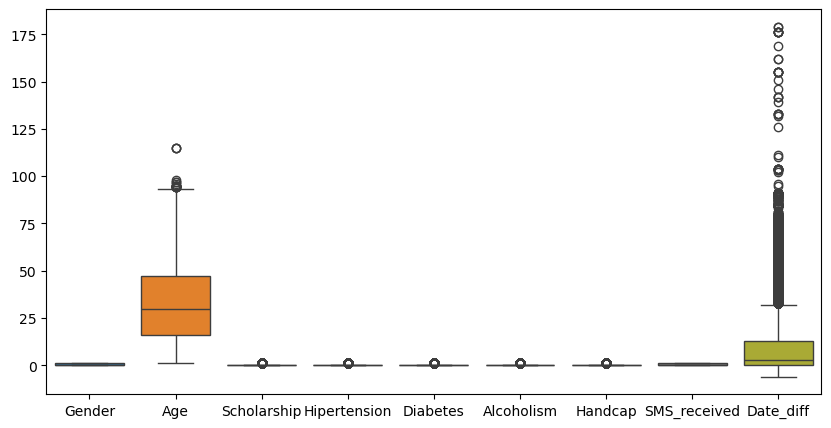

In [134]:
plt.figure(figsize=[10,5])
sns.boxplot(data=x_nm)

<Axes: ylabel='Age'>

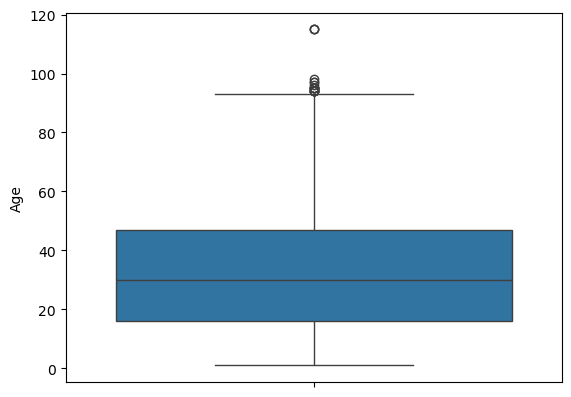

In [135]:
sns.boxplot(data=x_nm,y="Age")

(array([8.920e+03, 8.172e+03, 8.550e+03, 6.582e+03, 5.741e+03, 3.697e+03,
        1.173e+03, 4.960e+02, 2.600e+01, 3.000e+00]),
 array([  1. ,  12.4,  23.8,  35.2,  46.6,  58. ,  69.4,  80.8,  92.2,
        103.6, 115. ]),
 <BarContainer object of 10 artists>)

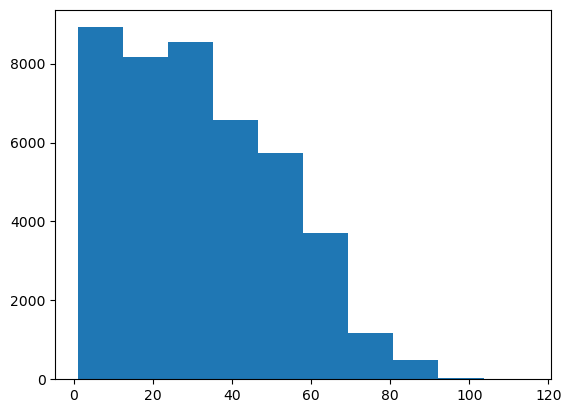

In [136]:
plt.hist(x_nm["Age"])

<Axes: xlabel='Age', ylabel='Density'>

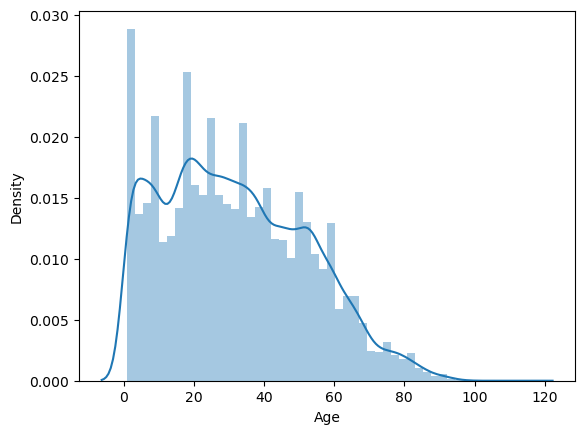

In [137]:
sns.distplot(x_nm["Age"])

In [138]:
x_nm["Age"].describe()

count    43360.000000
mean        31.932772
std         20.400304
min          1.000000
25%         16.000000
50%         30.000000
75%         47.000000
max        115.000000
Name: Age, dtype: float64

In [139]:
iqr=x_nm.Age.quantile(0.75)-x_nm.Age.quantile(0.25)
iqr

31.0

In [140]:
up=x_nm.Age.quantile(0.75)+(3*iqr)
up

140.0

In [141]:
x_nm.loc[x_nm["Age"]>140.0,"Age"]=140.0

(array([8.920e+03, 8.172e+03, 8.550e+03, 6.582e+03, 5.741e+03, 3.697e+03,
        1.173e+03, 4.960e+02, 2.600e+01, 3.000e+00]),
 array([  1. ,  12.4,  23.8,  35.2,  46.6,  58. ,  69.4,  80.8,  92.2,
        103.6, 115. ]),
 <BarContainer object of 10 artists>)

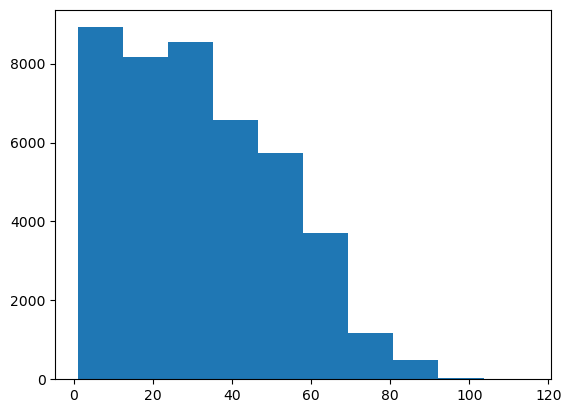

In [142]:
plt.hist(x_nm["Age"])

<Axes: xlabel='Age', ylabel='Density'>

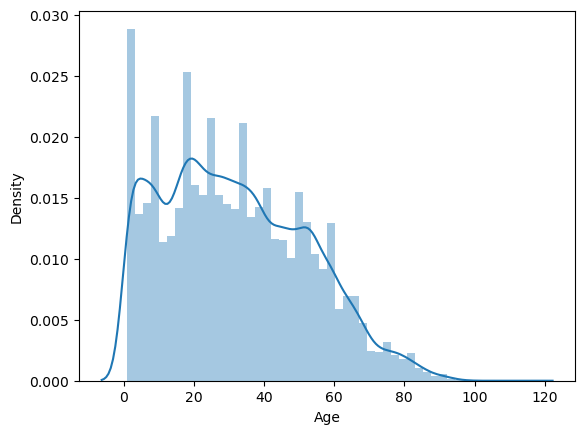

In [143]:
sns.distplot(x_nm["Age"])

<Axes: ylabel='Date_diff'>

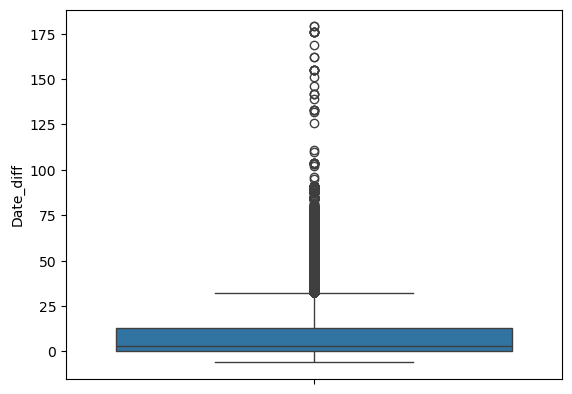

In [144]:
sns.boxplot(data=x_nm,y="Date_diff")

(array([3.192e+04, 8.026e+03, 2.448e+03, 6.250e+02, 2.560e+02, 5.400e+01,
        2.000e+00, 7.000e+00, 1.100e+01, 1.100e+01]),
 array([ -6. ,  12.5,  31. ,  49.5,  68. ,  86.5, 105. , 123.5, 142. ,
        160.5, 179. ]),
 <BarContainer object of 10 artists>)

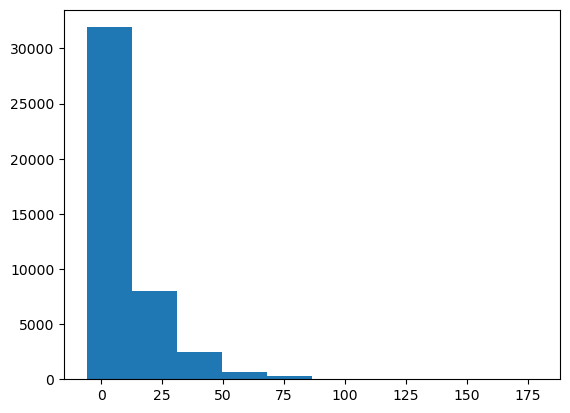

In [145]:
plt.hist(x_nm["Date_diff"])

<Axes: xlabel='Date_diff', ylabel='Density'>

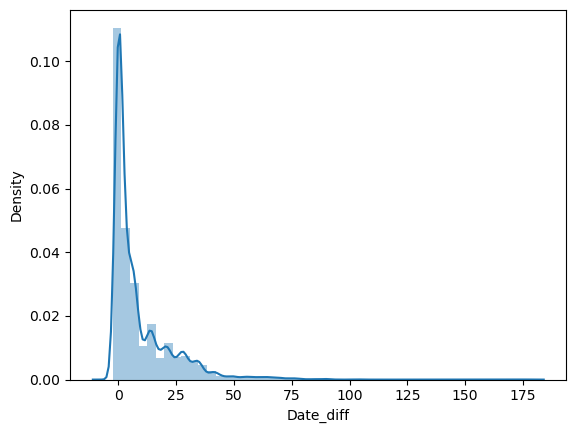

In [146]:
sns.distplot(x_nm["Date_diff"])

In [147]:
x_nm["Date_diff"].describe()

count    43360.000000
mean         9.073316
std         14.020005
min         -6.000000
25%          0.000000
50%          3.000000
75%         13.000000
max        179.000000
Name: Date_diff, dtype: float64

In [148]:
IQR=x_nm.Date_diff.quantile(0.75)-x_nm.Date_diff.quantile(0.25)
IQR

13.0

In [149]:
up1=x_nm.Date_diff.quantile(0.75)+(3*IQR)
up1

52.0

In [150]:
x_nm.loc[x_nm["Date_diff"]>52.0,"Date_diff"]=52.0

(array([5.0000e+00, 2.5359e+04, 6.1830e+03, 3.5650e+03, 2.2440e+03,
        2.0240e+03, 1.5100e+03, 8.8700e+02, 4.8100e+02, 1.1020e+03]),
 array([-6. , -0.2,  5.6, 11.4, 17.2, 23. , 28.8, 34.6, 40.4, 46.2, 52. ]),
 <BarContainer object of 10 artists>)

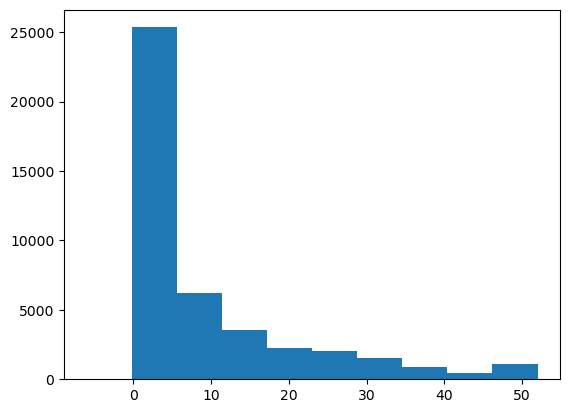

In [151]:
plt.hist(x_nm["Date_diff"])

<Axes: xlabel='Date_diff', ylabel='Density'>

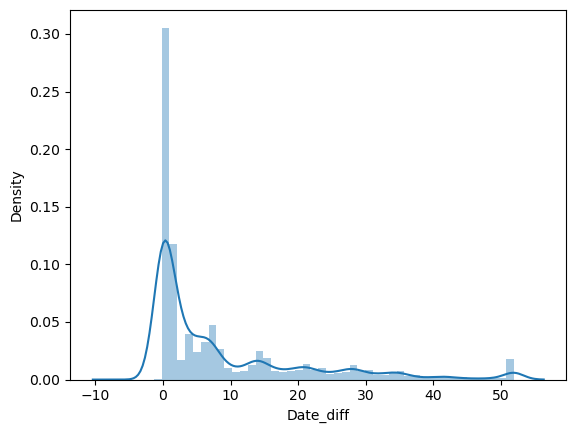

In [152]:
sns.distplot(x_nm["Date_diff"])

# Skewness Treatment

In [154]:
x_nm.skew()

Gender          0.680583
Age             0.413246
Scholarship     3.184943
Hipertension    2.466728
Diabetes        4.740630
Alcoholism      7.725238
Handcap         9.963980
SMS_received    0.922470
Date_diff       1.752741
dtype: float64

 Date_diff has skewness 1.75 , so i am using squareroot transformation

# SquareRoot Transformation

In [157]:
import numpy as np
x_nm.Date_diff=np.sqrt(x_nm["Date_diff"])

In [158]:
x_nm.skew()

Gender          0.680583
Age             0.413246
Scholarship     3.184943
Hipertension    2.466728
Diabetes        4.740630
Alcoholism      7.725238
Handcap         9.963980
SMS_received    0.922470
Date_diff       0.679619
dtype: float64

# Model Building

In [160]:
x_nm,y_nm=nm.fit_resample(x,y) 

In [161]:
x_nm_tr,x_nm_te,y_nm_tr,y_nm_te=train_test_split(x_nm,y_nm,test_size=0.2,random_state=101)

In [162]:
x_nm_tr.shape,x_nm_te.shape,y_nm_tr.shape,y_nm_te.shape

((34688, 9), (8672, 9), (34688,), (8672,))

# 1)Logistic Regression

In [164]:
lg.fit(x_nm_tr,y_nm_tr)

LogisticRegression()

In [165]:
p11=lg.predict(x_nm_te)

In [166]:
m11=confusion_matrix(p11,y_nm_te)
m11

array([[3116,  551],
       [1258, 3747]], dtype=int64)

In [167]:
TN,FP,FN,TP =m11.ravel()

In [168]:
nlp= TP/ (TP + FP)
nlp

0.8718008375988832

In [169]:
nlr= TP / (TP + FN)
nlr

0.7486513486513486

In [170]:
nlr= TP / (TP + FN)
nlr

0.7486513486513486

In [171]:
nlf1= 2* (nlp * nlr) / (nlp + nlr)
nlf1

0.8055465978716542

In [172]:
nac1=m11.diagonal().sum()/m11.sum()*100
nac1

79.13976014760148

In [173]:
print(classification_report(p11,y_nm_te))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78      3667
           1       0.87      0.75      0.81      5005

    accuracy                           0.79      8672
   macro avg       0.79      0.80      0.79      8672
weighted avg       0.80      0.79      0.79      8672



# 2)Decision Tree

In [175]:
dt=DecisionTreeClassifier()

In [176]:
dt.fit(x_nm_tr,y_nm_tr)

DecisionTreeClassifier()

In [177]:
d_p1=dt.predict(x_nm_te)

In [178]:
d_m11=confusion_matrix(d_p1,y_nm_te)
d_m11

array([[3260,  577],
       [1114, 3721]], dtype=int64)

In [179]:
TN,FP,FN,TP =d_m11.ravel()

In [180]:
ndp1= TP/ (TP + FP)
ndp1

0.8657515123313169

In [181]:
ndr1= TP / (TP + FN)
ndr1

0.7695966907962771

In [182]:
ndf1= 2* (ndp1 * ndr1) / (ndp1 + ndr1)
ndf1

0.8148472571991678

In [183]:
d_ac1=d_m11.diagonal().sum()/d_m11.sum()*100
d_ac1 

80.50046125461255

In [184]:
print(classification_report(d_p1,y_nm_te))

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      3837
           1       0.87      0.77      0.81      4835

    accuracy                           0.81      8672
   macro avg       0.81      0.81      0.80      8672
weighted avg       0.81      0.81      0.81      8672



# 3)Random Forest

In [186]:
rf=RandomForestClassifier()

In [187]:
rf.fit(x_nm_tr,y_nm_tr)

RandomForestClassifier()

In [188]:
rp11=rf.predict(x_nm_te)

In [189]:
r_m1=confusion_matrix(rp11,y_nm_te)
r_m1

array([[3207,  517],
       [1167, 3781]], dtype=int64)

In [190]:
TN,FP,FN,TP =r_m1.ravel()

In [191]:
rfp= TP/ (TP + FP)
rfp

0.8797114937180084

In [192]:
rfr= TP / (TP + FN)
rfr

0.7641471301535974

In [193]:
rff1= 2* (rfp * rfr) / (rfp + rfr)
rff1

0.81786718581008

In [194]:
rf_acc=r_m1.diagonal().sum()/r_m1.sum()*100
rf_acc

80.58118081180811

In [195]:
print(classification_report(rp11,y_nm_te))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      3724
           1       0.88      0.76      0.82      4948

    accuracy                           0.81      8672
   macro avg       0.81      0.81      0.80      8672
weighted avg       0.82      0.81      0.81      8672



# 4)KNN

In [197]:
knn=KNeighborsClassifier(n_neighbors=40)

In [198]:
knn.fit(x_nm_tr,y_nm_tr)

KNeighborsClassifier(n_neighbors=40)

In [199]:
kp11=knn.predict(x_nm_te)

In [200]:
k_c1=confusion_matrix(kp11,y_nm_te)
k_c1

array([[3302,  652],
       [1072, 3646]], dtype=int64)

In [201]:
TN,FP,FN,TP =k_c1.ravel()

In [202]:
k_p1= TP/ (TP + FP)
k_p1

0.8483015355979525

In [203]:
kr1= TP / (TP + FN)
kr1

0.7727850784230607

In [204]:
kf11= 2* (k_p1 * kr1) / (k_p1 + kr1)
kf11

0.8087843833185449

In [205]:
k1_acc=k_c1.diagonal().sum()/k_c1.sum()*100
k1_acc

80.119926199262

In [206]:
print(classification_report(kp11,y_nm_te))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      3954
           1       0.85      0.77      0.81      4718

    accuracy                           0.80      8672
   macro avg       0.80      0.80      0.80      8672
weighted avg       0.81      0.80      0.80      8672



# 5)SVM

In [208]:
svc=SVC()
svc.fit(x_nm_tr,y_nm_tr)
sp1=svc.predict(x_nm_te)
sm1=confusion_matrix(sp1,y_nm_te)
sm1
TN,FP,FN,TP =sm1.ravel()
#s_p1= TP/ (TP + FP)
s_p1=0
#s_r1= TP / (TP + FN)
s_r1=0
#sv_f1= 2* (s_p * s_r) / (s_p + s_r)
sv_f1=0
s_acc1=sm1.diagonal().sum()/sm1.sum()*100
s_acc1
print(classification_report(sp1,y_nm_te))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      4304
           1       0.80      0.79      0.79      4368

    accuracy                           0.79      8672
   macro avg       0.79      0.79      0.79      8672
weighted avg       0.79      0.79      0.79      8672



# 6)NAIVE BAYES

In [210]:
print(np.any(x_nm_tr < 0))
x_nm_tr[x_nm_tr < 0] = 0
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_nm_tr,y_nm_tr)
n_p1=nb.predict(x_nm_te)
n_m1=confusion_matrix(n_p1,y_nm_te)
n_m1
TN,FP,FN,TP =n_m1.ravel()
n_p= TP/ (TP + FP)
n_p
n_r= TP / (TP + FN)
n_r
n_f1= 2* (n_p * n_r) / (n_p + n_r)
n_f1
n_ac1=n_m1.diagonal().sum()/n_m1.sum()*100
n_ac1
print(classification_report(n_p1,y_nm_te))

True
              precision    recall  f1-score   support

           0       0.64      0.81      0.72      3450
           1       0.85      0.70      0.77      5222

    accuracy                           0.74      8672
   macro avg       0.75      0.76      0.74      8672
weighted avg       0.77      0.74      0.75      8672



# XgBoost

In [212]:
xgb1=XGBClassifier()

In [213]:
xgb1.fit(x_nm_tr,y_nm_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [214]:
xgb_p=xgb1.predict(x_nm_te)

In [215]:
predictions = (xgb_p > 0.5).astype(int)

In [216]:
xgb_m=confusion_matrix(predictions,y_nm_te)
xgb_m

array([[3369,  563],
       [1005, 3735]], dtype=int64)

In [217]:
TN,FP,FN,TP =xgb_m.ravel()

In [218]:
xgb_p= TP/ (TP + FP)
xgb_p

0.8690088413215449

In [219]:
xgb_r= TP / (TP + FN)
xgb_r

0.7879746835443038

In [220]:
xgb_f1= 2* (xgb_p * xgb_r) / (xgb_p + xgb_r)
xgb_f1

0.8265102898871431

In [221]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

81.91881918819189

In [222]:
print(classification_report(y_nm_te,predictions))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4374
           1       0.79      0.87      0.83      4298

    accuracy                           0.82      8672
   macro avg       0.82      0.82      0.82      8672
weighted avg       0.82      0.82      0.82      8672



# PRC -TN Rate is high

In [224]:
df1=pd.DataFrame(predictions)

In [225]:
precision1,recall1,threshold1=precision_recall_curve(y_nm_te,df1)

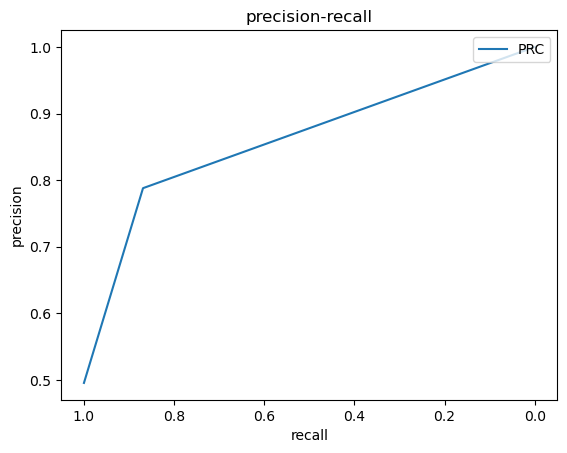

In [226]:
plt.plot(recall1,precision1,label="PRC")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper right")
plt.title("precision-recall")
plt.gca().invert_xaxis()  # Invert the x-axis to mirror the curve
plt.show()

# REPORT

In [228]:
l1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","SVM","NAIVE BAYES","XgBoost"]
l2=[nac1,d_ac1,rf_acc,k1_acc,s_acc1,n_ac1,xgb_acc]
l3=[nlp,ndp1,rfp,k_p1,s_p1,n_p,xgb_p]
l4=[nlr,ndr1,rfr,kr1,s_r1,n_r,xgb_r]
l5=[nlf1,ndf1,rff1,kf11,sv_f1,n_f1,xgb_f1]

In [229]:
result1=pd.DataFrame({"MODEL NAME":l1,"ACCURACY":l2,"PRECISION":l3,"RECALL":l4,"F-1 SCORE":l5})
result1

,MODEL NAME,ACCURACY,PRECISION,RECALL,F-1 SCORE
0,LOGISTIC REGRESSION,79.139760,0.871801,0.748651,0.805547
1,DECISION TREE,80.500461,0.865752,0.769597,0.814847
2,RANDOM FOREST,80.581181,0.879711,0.764147,0.817867
3,KNN,80.119926,0.848302,0.772785,0.808784
4,SVM,79.289668,0.000000,0.000000,0.000000
5,NAIVE BAYES,74.423432,0.849465,0.699157,0.767017
6,XgBoost,81.918819,0.869009,0.787975,0.826510


 XgBoost is best due to accuracy , precision and recall and f1_Score.

# Feature Selection

# RFE

In [233]:
rfe=RFE(dt)

In [234]:
rfe.fit(x_nm,y_nm)

RFE(estimator=DecisionTreeClassifier())

In [235]:
rfe.support_

array([False,  True,  True,  True, False, False, False, False,  True])

In [236]:
df3=pd.DataFrame(rfe.support_)
df3

,0
0,False
1,True
2,True
3,True
4,False
5,False
6,False
7,False
8,True


In [237]:
pdf4=pd.DataFrame({"feature_score":list(rfe.support_),"columns":list(x_nm.iloc[:-1])})
pdf4

,feature_score,columns
0,False,Gender
1,True,Age
2,True,Scholarship
3,True,Hipertension
4,False,Diabetes
5,False,Alcoholism
6,False,Handcap
7,False,SMS_received
8,True,Date_diff


In [238]:
data_newx=x_nm.drop(["Gender","Diabetes","Alcoholism","Handcap","SMS_received"],axis=1)
data_newx

,Age,Scholarship,Hipertension,Date_diff
0,23,0,0,2
1,39,0,0,2
2,29,0,0,3
3,40,1,0,1
4,30,0,0,2
...,...,...,...,...
43355,26,0,0,0
43356,35,0,0,0
43357,44,0,0,0
43358,31,0,0,1


In [239]:
rfxrf =data_newx.iloc[:,0:]
rfyrf=y_nm

In [240]:
rfxrf.shape,rfyrf.shape

((43360, 4), (43360,))

In [241]:
frx_train,frx_test,fry_train,fry_test=train_test_split(rfxrf,rfyrf,test_size=0.2,random_state=101)

In [242]:
frx_train.shape,frx_test.shape,fry_train.shape,fry_test.shape

((34688, 4), (8672, 4), (34688,), (8672,))

# Random Forest

In [244]:
rf.fit(frx_train,fry_train)

RandomForestClassifier()

In [245]:
fpr1=rf.predict(frx_test)

In [246]:
frcm11=confusion_matrix(fpr1,fry_test)
frcm11

array([[3323,  633],
       [1051, 3665]], dtype=int64)

In [247]:
TN,FP,FN,TP =frcm11.ravel()

In [248]:
frf_p= TP/ (TP + FP)
frf_p

0.8527221963704048

In [249]:
frf_r= TP / (TP + FN)
frf_r

0.7771416454622562

In [250]:
frf_f1= 2* (frf_p * frf_r) / (frf_p + frf_r)
frf_f1

0.813179498557799

In [251]:
frac11=frcm11.diagonal().sum()/frcm11.sum()*100
frac11

80.58118081180811

In [252]:
print(classification_report(fpr1,fry_test))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      3956
           1       0.85      0.78      0.81      4716

    accuracy                           0.81      8672
   macro avg       0.81      0.81      0.81      8672
weighted avg       0.81      0.81      0.81      8672



# XGBoost

In [254]:
xgb=XGBClassifier()

In [255]:
xgb.fit(frx_train,fry_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [256]:
xgb_p1=xgb.predict(frx_test)

In [257]:
predictions1 = (xgb_p1 > 0.5).astype(int)

In [258]:
xgb_m11=confusion_matrix(predictions1,fry_test)
xgb_m11

array([[3398,  666],
       [ 976, 3632]], dtype=int64)

In [259]:
TN,FP,FN,TP =xgb_m11.ravel()

In [260]:
xgb_p1= TP/ (TP + FP)
xgb_p1

0.8450442066077245

In [261]:
xgb_r1= TP / (TP + FN)
xgb_r1

0.7881944444444444

In [262]:
xgb_f1_1= 2* (xgb_p1 * xgb_r1) / (xgb_p1 + xgb_r1)
xgb_f1_1

0.8156299124185942

In [263]:
xgb_acc1=xgb_m11.diagonal().sum()/xgb_m11.sum()*100
xgb_acc1

81.06549815498155

In [264]:
print(classification_report(predictions1,fry_test))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      4064
           1       0.85      0.79      0.82      4608

    accuracy                           0.81      8672
   macro avg       0.81      0.81      0.81      8672
weighted avg       0.81      0.81      0.81      8672



# PRC Curve - TN Rate is high

In [266]:
df2=pd.DataFrame(predictions1)

In [267]:
precision2,recall2,threshold2=precision_recall_curve(fry_test,df2)

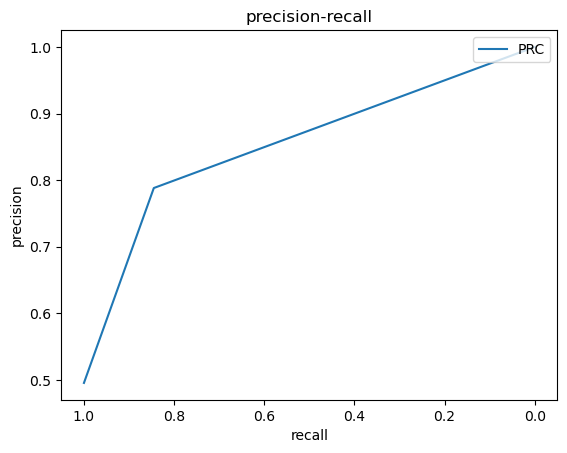

In [268]:
plt.plot(recall2,precision2,label="PRC")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper right")
plt.title("precision-recall")
plt.gca().invert_xaxis()  # Invert the x-axis to mirror the curve
plt.show()

# Report

In [270]:
l_1=["RANDOM FOREST","XgBoost"]
l_2=[frac11,xgb_acc1]
l_3=[frf_p,xgb_p1]
l_4=[frf_r,xgb_r1]
l_5=[frf_f1,xgb_f1_1]

In [271]:
result2=pd.DataFrame({"MODEL NAME":l_1,"ACCURACY":l_2,"PRECISION":l_3,"RECALL":l_4,"F-1 SCORE":l_5})
result2

,MODEL NAME,ACCURACY,PRECISION,RECALL,F-1 SCORE
0,RANDOM FOREST,80.581181,0.852722,0.777142,0.813179
1,XgBoost,81.065498,0.845044,0.788194,0.815630


After Applying Feature selection RFE ,XgBoost is the best in presence of accuracy , precision , recall and f1score.

# Cross Validation

In [274]:
cross = cross_val_score(xgb,rfxrf,rfyrf,cv=5)

In [275]:
print(f"Cross-validation scores: {cross}")
print(f"Mean CV accuracy: {cross.mean():.2f}")

Cross-validation scores: [0.7795203  0.8099631  0.77698339 0.81595941 0.79993081]
Mean CV accuracy: 0.80


skf = StratifiedKFold(n_splits=5)

# StratifiedKFold

In [283]:
cross1 = cross_val_score(xgb,rfxrf,rfyrf, cv=skf)

In [285]:
print(f"Stratified CV accuracy: {cross1.mean():.2f}")

Stratified CV accuracy: 0.80


In [287]:
print(f"Standard deviation of CV scores: {cross1.std():.2f}")

Standard deviation of CV scores: 0.02


The model works well, with an average accuracy of about 80%. The low variation in the StratifiedKFold results shows that the model performs consistently across different parts of the data. Overall, you can trust that the model's performance is stable and reliable.